In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

bottle = pd.read_csv('/content/bottle.csv')

In [78]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0.0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8.0,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3.0,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.0,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7.0,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19.0,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3.0,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20.0,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7.0,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,606106.000000,606106.000000,606105.000000,595545.000000,559272.000000,452342.000000,556030.000000,417696.000000,417696.000000,0.0,606105.000000,595545.000000,11322.000000,559272.000000,48828.000000,595549.0,155115.000000,52205.000000,190943.000000,54401.000000,551704.0,54403.000000,551702.0,178447.000000,427862.000000,118429.000000,487751.000000,103472.000000,502672.000000,101952.000000,504330.000000,0.0,606105.0,2426.000000,2426.000000,603679.0,2405.000000,2405.000000,603700.0,3972.000000,3972.000000,602133.0,3972.000000,3972.000000,602133.0,3990.000000,606105.000000,595545.000000,560491.000000,559272.000000,553900.000000,553900.000000,559815.000000,452342.000000,422730.000000,118429.000000,178447.000000,101952.000000,103472.000000,0.0,54401.000000,54403.000000,606105.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11810.309726,303053.500000,252.647145,10.662790,33.908162,3.208188,25.880266,54.113373,140.756868,NaN,4.793369,2.005699,8.899134,2.586412,8.951237,9.0,8.991284,8.959199,8.986729,0.440832,9.0,0.214895,9.0,1.672218,8.999523,28.546402,8.999846,0.041048,8.999922,17.525736,8.999649,NaN,9.0,10.822098,1.234130,9.0,10.641580,1.232432,9.0,0.190775,1.991188,9.0,8.991571,1.223565,9.0,29.104737,252.647145,10.662790,10.724478,33.908108,25.874803,214.958596,0.460694,3.208188,54.275065,28.546402,1.672218,17.525736,0.041048,NaN,0.440832,0.214895,254.446721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7186.260594,174967.875466,350.646491,4.432761,0.468209,2.095207,1.021321,37.490575,91.227471,NaN,1.869769,0.114448,0.437490,0.492477,0.264769,0.0,0.092953,0.197830,0.114433,1.284091,0.0,0.588437,0.0,1.083954,0.021830,31.415882,0.012399,0.097145,0.008808,14.860400,0.018731,NaN,0.0,24.451394,0.423541,0.0,23.627998,0.422471,0.0,0.248833,0.093468,0.0,20.743150,0.416686,0.0,31.858579,350.646491,4.432761,4.431431,0.469849,1.020462,94.551005,0.409257,2.095207,37.442136,31.415882,1.083954,14.860400,0.097145,NaN,1.284091,0.588437,354.488274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,1.440000,29.170000,0.000000,20.996000,0.000000,0.000000,NaN,3.000000,1.000000,6.000000,2.000000,6.000000,9.0,8.000000,8.000000,8.000000,0.000000,9.0,-0.320000,9.0,0.000000,8.000000,0.000000,8.000000,0.000000,8.000000,0.000000,8.000000,NaN,9.0,-0.020000,1.000000,9.0,-0.010000,1.000000,9.0,0.000000,1.000000,9.0,0.000000,1.000000,9.0,0.100000,0.000000,1.440000,1.080000,4.570000,20.990000,14.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,-0.320000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5748.000000,151527.250000,50.000000,7.420000,33.550000,1.030000,25.023000,16.000000,46.962730,NaN,3.000000,2.000000,9.000000,2.000000,9.000000,9.0,9.000000,9.000000,9.000000,0.060000,9.0,0.040000,9.0,0.520000,9.000000,3.000000,9.000000,0.000000,9.000000,0.500000,9.000000,NaN,9.0,1.100000,1.000000,9.0,1.100000,1.000000,9.0,0.120000,2.000000,9.0,1.100000,1.000000,9.0,3.100000,50.000000,7.420000,7.510000,33.550000,25.020000,138.600000,0.150000,1.030000,16.300000,3.000000,0.520000,0.500000,0.000000,NaN,0.060000,0.040000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11564.000000,303053.500000,130.000000,9.930000,33.946000,3.180000,26.078000,50.100000,139.745650,NaN,5.000000,2.000000,9.000000,3.000000,9.000000,9.0,9.000000,9.000000,9.000000,0.140000,9.0,0.090000,9.0,1.700000,9.000000,18.700000,9.000000,0.010000,9.000000,18.200000,9.000000,NaN,9.0,2.750000,1.000000,9.0,2.700000,1.000000,9.0,0.150000,2.000000,9.0,2.500000,1.000000,9.0,17.700000,130.000000,9.

In [80]:
bottle.shape

(606106, 74)

In [81]:
bottle_new = bottle[[
    'Depthm',
    'T_degC',
    'Salnty',
    'O2ml_L', # 20% null
    'STheta',
    'O2Sat', # 24% null
    'Oxy_µmol/Kg', # 24% null

]]

In [82]:
bottle_new.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg'],
      dtype='object')

In [83]:
bottle_new.columns
bottle_new = bottle_new.dropna()

In [84]:
bottle_new.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg
count,417696.000000,417696.000000,417696.000000,417696.000000,417696.000000,417696.000000,417696.000000
mean,251.800994,10.795222,33.912422,3.231432,25.869935,54.113373,140.756868
std,358.300374,4.490001,0.473102,2.092699,1.032738,37.490575,91.227471
min,0.000000,1.440000,29.402000,0.000000,20.996000,0.000000,0.000000
25%,50.000000,7.520000,33.554000,1.080000,25.001000,16.000000,46.962730
50%,134.000000,10.030000,33.950000,3.210000,26.071000,50.100000,139.745650
75%,300.000000,13.970000,34.270000,5.370000,26.701000,95.300000,234.166425
max,5351.000000,31.140000,37.034000,9.980000,28.083000,186.300000,435.179800


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame and it has been defined already
df = bottle_new  # replace this with your dataframe

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Define the model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the training data
kmeans.fit(train)

# Predict the labels of the test set
predictions = kmeans.predict(test)

# Evaluate the model using silhouette score
score = silhouette_score(test, predictions)

print(f'Silhouette Score: {score}')


Silhouette Score: 0.737303038741639


In [86]:
# Fit the model to the training data
# kmeans.fit(train)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Create a new DataFrame for each cluster
cluster_1 = train[labels == 0]
cluster_2 = train[labels == 1]
print(cluster_1)
print(cluster_2)

        Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  Oxy_µmol/Kg
81029     30.0   16.50  33.648    5.39  24.595   96.8    234.93910
330804   600.0    4.69  34.256    0.40  27.126    5.6     17.39222
514951    30.0   13.62  32.790    6.22  24.559  104.9    271.12660
112870    75.0   16.85  33.897    5.36  24.706   97.1    233.60610
47983    201.0    7.01  33.870    2.67  26.530   39.2    116.16050
...        ...     ...     ...     ...     ...    ...          ...
197951   300.0    9.16  34.068    4.50  26.368   69.4    195.80700
350374   295.0    8.88  34.310    0.97  26.602   14.9     42.19766
549696    18.0   15.50  33.346    5.80  24.589  102.0    252.81160
228570    80.0   15.98  35.140    4.23  25.864   75.9    184.14900
200191   124.0    7.07  33.190    5.72  25.985   83.7    248.98530

[307917 rows x 7 columns]
        Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  Oxy_µmol/Kg
5791     800.0    4.23  34.286    0.41  27.201    5.6    17.825720
409644  2400.0    1.87  34.668    2

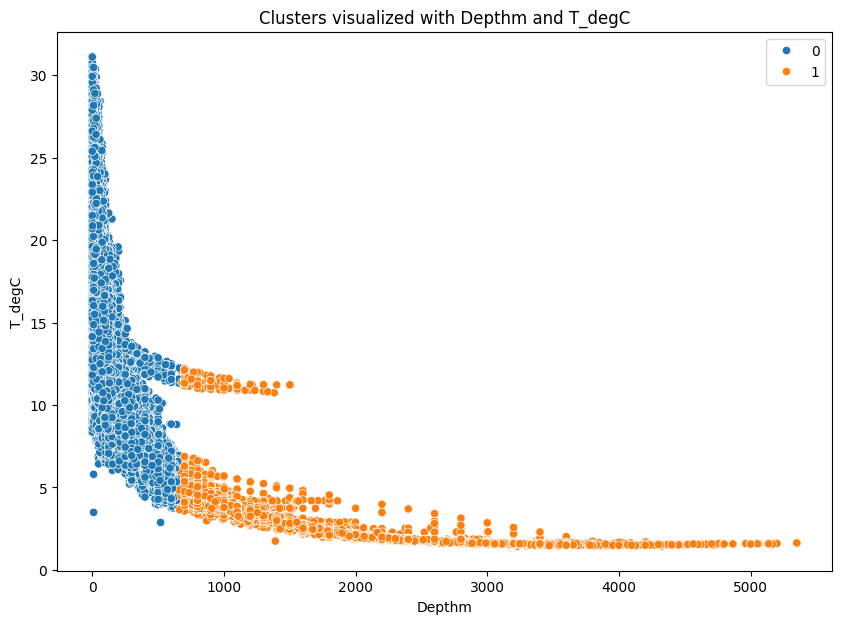

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that 'Depthm' and 'T_degC' are the names of the first two columns
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train, x='Depthm', y='T_degC', hue=labels)

plt.title('Clusters visualized with Depthm and T_degC')
plt.show()


In [88]:
import pickle
with open('model.pickle', 'wb') as file:
  pickle.dump(kmeans, file)

In [89]:
with open('model.pickle', 'rb') as file:
    model = pickle.load(file)


sample1 = [[150, 11.370, 33.3960, 5.090, 25.46400, 82.10, 221.67470]]
predictions1 = model.predict(sample1)
print("Not Good For Fishing" if predictions1[0] else "Best For Fishing")


Best For Fishing


In [90]:
sample2 = [[4021,    1.51,  34.683,    3.35,  27.778,   42.9,    145.56740]]
predictions2 = model.predict(sample2)
print("Not Good For Fishing" if predictions2[0] else "Best For Fishing")

Not Good For Fishing


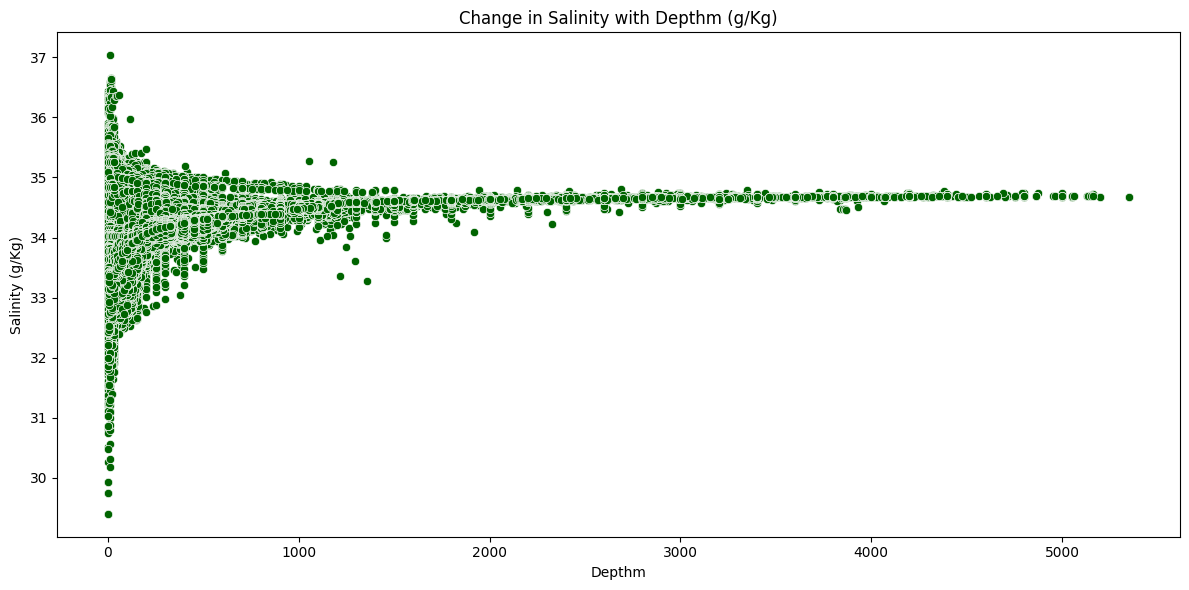

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_yearly_and_seasonal_change_salinity(df):
    # Create a figure with a single subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.scatterplot(data=df, x='Depthm', y='Salnty', color='darkgreen', ax=ax)
    ax.set_title('Change in Salinity with Depthm (g/Kg)')
    ax.set_xlabel('Depthm')
    ax.set_ylabel('Salinity (g/Kg)')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the function with your DataFrame
show_yearly_and_seasonal_change_salinity(df)



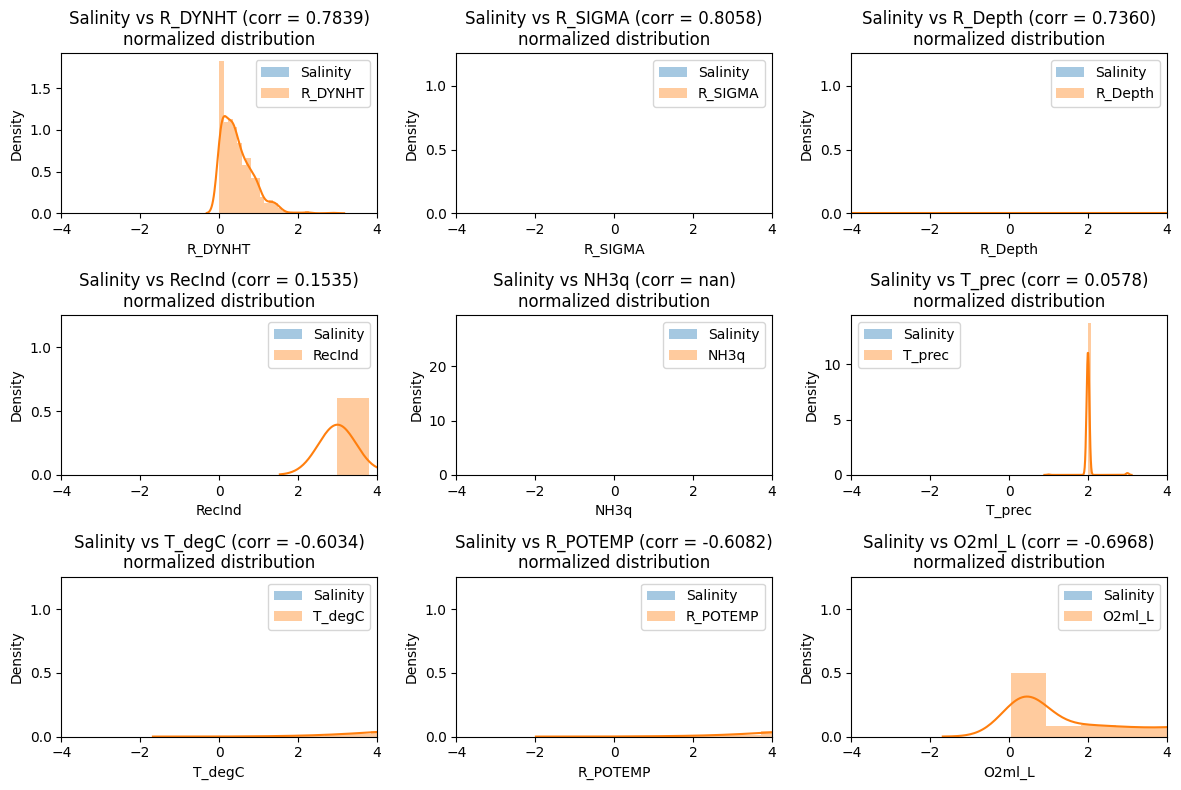

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_salinity_vs_attributes(df_sample, df_plot):
    fig = plt.figure(figsize=(12, 8))  # Adjust the figsize here
    col = 3
    row = int(len(df_plot.Attributes) / col)
    count = 1

    for i, j in zip(df_plot.Attributes, df_plot.Correlation):
        ax = fig.add_subplot(row, col, count)
        ax.set_title('Salinity vs {} (corr = {:.4f})\nnormalized distribution'.format(i, j))
        ax.set_xlim(-4, 4)
        sns.distplot(df_sample.Salnty, ax=ax, label='Salinity')
        sns.distplot(df_sample[i], ax=ax, label=i)
        ax.legend()
        count += 1

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and plot data
plot_salinity_vs_attributes(df_sample, df_plot)



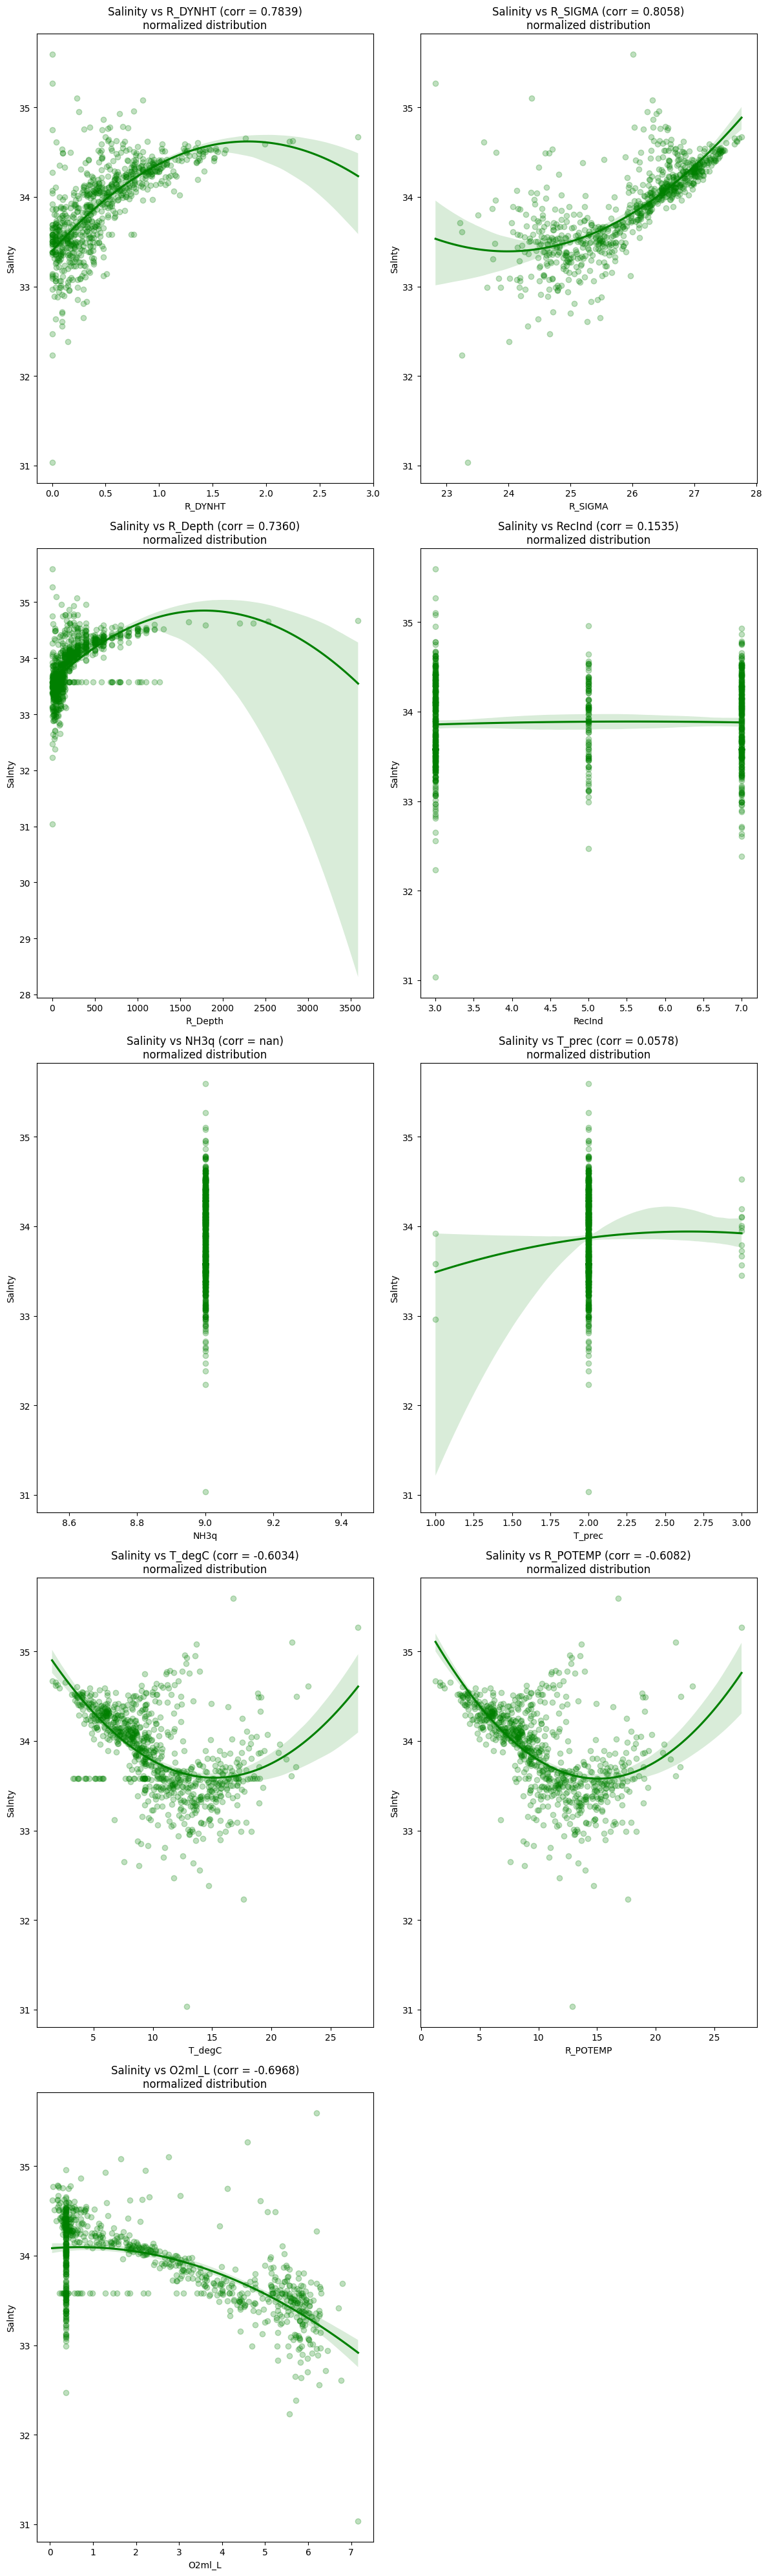

In [95]:
def plot_salinity_vs_attributes(df_sample, df_plot):
    # Set smaller figure size
    fig = plt.figure(figsize=(12, 40))
    col = 2  # Reduce the number of columns to fit smaller figure size
    row = int(len(df_plot.Attributes) / col) + 1  # Adjust the number of rows
    count = 1

    for i, j in zip(df_plot.Attributes, df_plot.Correlation):
        ax = fig.add_subplot(row, col, count)
        ax.set_title('Salinity vs {} (corr = {:.4f})\nnormalized distribution'.format(i, j))

        try:
            sns.regplot(x=df_sample[i], y="Salnty", data=df_sample, order=2, scatter_kws={'alpha': 0.25}, color='green', ax=ax)
        except Exception as e:
            print(f"Error plotting {i}: {e}")

        count += 1

    plt.tight_layout()
    plt.show()

# Example usage:
plot_salinity_vs_attributes(df_sample, df_plot)



In [96]:
dfLOC = pd.read_csv('/content/cast.csv')

In [106]:
import folium
from folium.plugins import MarkerCluster
dfLOC = dfLOC[['Lat_Dec', 'Lon_Dec','Date']]
dfLOC = dfLOC.tail(1000)
dfLOC = dfLOC.reset_index(drop=True)  # reset index after tail

#  create folium map
salinity_map   = folium.Map(location=[dfLOC.Lat_Dec.mean(),dfLOC.Lon_Dec.mean()], zoom_start=6)
marker_cluster = MarkerCluster().add_to(salinity_map)

for i in range(len(dfLOC)):
    folium.Marker(location=[dfLOC.Lat_Dec[i],dfLOC.Lon_Dec[i]],
            popup = (dfLOC.Date[i]),         # dates in popups
            icon = folium.Icon(color='green')  # green popup icon
    ).add_to(marker_cluster)

salinity_map.add_child(marker_cluster)
salinity_map         #  display map